# Project Phase 1: Multimedia and Web Databases CSE 515

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import cv2
import os
import shutil

# Import necessary functions

from keras.preprocessing import image
from sklearn.preprocessing import normalize
from skimage.io import imshow
from skimage.feature import local_binary_pattern, hog
from skimage import exposure
from scipy.stats import skew, wasserstein_distance
from scipy.spatial.distance import correlation, cosine

%matplotlib inline

In [2]:
# Slice 64 x 64 image into 64 vectors of 8 x 8
# Helper Function

def slice_channel(channel):
    slices = []
    r = 0
    while r < channel.shape[0]:
        c = 0
        while c < channel.shape[1]:
            channel_slice = channel[r:r + 8, c:c + 8]
            slices.append(channel_slice)
            c = c + 8
        r = r + 8
    return slices

## Task 0:
### In this phase of the project download and familiarize yourselves with the following data sets provided in the web site.  
#### – Face images  – Associated metadata

In [3]:
# Import the original dataset of 400 images 

from sklearn.datasets import fetch_olivetti_faces
d = fetch_olivetti_faces()
print(d.DESCR)
X = d.data
Y = d.target
imgs = d.images
print("Shape of X:", X.shape, "\tType of X:" , type(X))
print("Shape of Y:", Y.shape, "\t\tType of Y:" , type(Y))
print("Shape of Images:", imgs.shape, "\tType of Images:" , type(imgs))

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

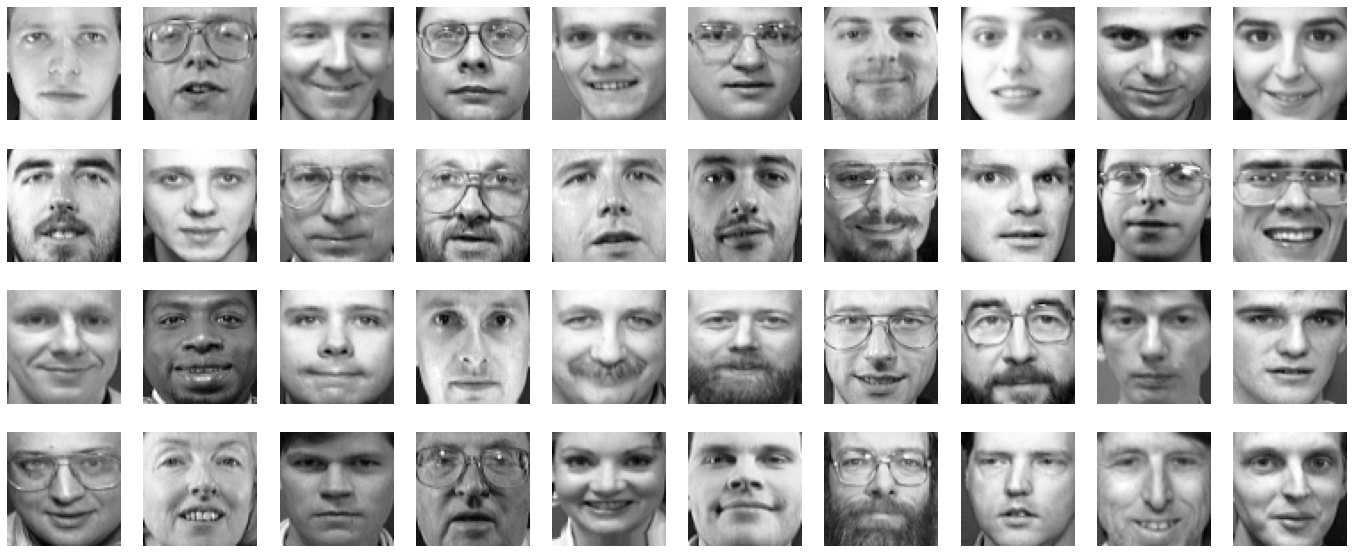

In [4]:
#extract all 40 unique images

unique_img=[]
u_imgs_vector = []
unique_img.append(imgs[0])
u_imgs_vector.append(X[0])
for i in range(1,40):
    st = str(i) + '0'
    unique_img.append(imgs[int(st)])
    u_imgs_vector.append(X[int(st)])

#display all 40 unique images

fig = plt.figure(figsize=(24, 10))
columns = 10
rows = 4
for i in range(1, columns*rows +1):
    img = unique_img[i-1]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img, cmap='gray')
plt.show()

In [5]:
# This function calculates the mean of the 8X8 matrix provided as slices
def calculate_first_moment(channel):
    return np.mean(channel)

# This function calculates the standard deviation of the 8X8 matrix provided as slices
def calculate_second_moment(channel):
    return np.std(channel)


# This function calculates the skewness of the 8X8 matrix provided as slices
def calculate_third_moment(channel):
    # Flatten the array, and calculate the skewness
    return skew(np.ndarray.flatten(channel), 0)

In [6]:
# This function takes a sliced image as input and returns color moments of shape 8 x 8 x 3

def calculate_CM(img):
    sliced_image = slice_channel(img)
    color_m = []
    #iterating each 8X8 matrix 64 times for each image
    for i in sliced_image:
        color_temp =[]
        #append color moments to a temporary array
        color_temp.append(calculate_first_moment(i))
        color_temp.append(calculate_second_moment(i))
        color_temp.append(calculate_third_moment(i))
        #append temporary array to final color moments of all images
        color_m.append(color_temp)
    return np.array(color_m).reshape(8,8,3)

In [7]:
# This function extracts local binary patterns for images with 8 neighbors

def calculate_LBP(img):
    lbp_features=[]
    lbp = local_binary_pattern(img, 8, 1, 'ror')
    hist, edges = np.histogram(lbp, bins = 256, range = (0.0, 255.0))
    hist = hist.astype("float")
    hist = hist/(hist.sum() + 1e-7)
    lbp_features.append(hist)
    return lbp_features

In [8]:
# This function calculates HOG for each image

def calculate_HOG(img):
    hog_features=[]
    fd, hog_img = hog(img, orientations=9, pixels_per_cell=(8, 8), visualize=True, cells_per_block=(2, 2), block_norm='L2-Hys')
    hog_features.append(fd)
    return hog_features


## Task 1: 
### Implement a program which, given an image ID and one of the following models, extracts and prints (in a human readable form) the corresponding feature descriptors

In [9]:
def task_1(test_img_path, input_img, model):
    
    os.chdir(test_img_path)
    img = image.load_img(input_img, target_size =(64, 64), color_mode='grayscale' )
    img = image.img_to_array(img).reshape((64,64))
    if model == 'CM8x8':
        return calculate_CM(img) 
    elif model == 'ELBP':
        return calculate_LBP(img)
    elif model == 'HOG':
        return calculate_HOG(img)
    else:
        print('Please enter a valid model')

In [10]:
#Set the parameters for the function for task 1

select_folder = 'Test Data' ### Folder name
select_set = 'set1'         ### Set name 
input_img = 'image-0.png'  ### Test image as .png
model = 'CM8x8'                ### Model name from 'CM8x8, ELBP, HOG'


test_img_path = 'C:\\Users\\hp\\OneDrive\\Desktop\\'+ select_folder + '\\' + select_set + '\\'


features = task_1(test_img_path, input_img, model)

print("The feature descriptor for",input_img,"and",model,"are\n",features[0])

The feature descriptor for image-0.png and CM8x8 are
 [[ 1.47078125e+02  4.15042534e+01 -5.50547098e-01]
 [ 1.96093750e+02  4.51289368e+00 -7.12079078e-01]
 [ 2.03921875e+02  3.69672441e+00  4.03322192e-01]
 [ 2.23531250e+02  6.45408964e+00 -5.34948668e-01]
 [ 2.14203125e+02  8.63709259e+00 -1.89562604e-01]
 [ 2.03359375e+02  4.38878965e+00 -1.24893671e+00]
 [ 2.02687500e+02  5.23770905e+00 -9.83680590e-01]
 [ 1.33718750e+02  4.28921127e+01 -1.74879293e-01]]


## Task 2:
### Implement a program which, given a folder with images, extracts and stores feature descriptors for all the images in the folder.

In [11]:
def task_2(img_path):
    
    os.chdir(img_path)

    set2_f = os.listdir(img_path)
    n=len(set2_f)
    for f in set2_f:
        if not(f.endswith(".png")):
            set2_f.remove(f)
    
    features_t2 = open("features.txt","w+")
    
    for im in set2_f:
        img = image.load_img(im, target_size =(64, 64), color_mode='grayscale' )
        i = image.img_to_array(img).reshape((64,64))
        
        nm = str(im) + ": Color Moments"
        features_t2.write(nm+"\n")
        features_t2.write(str(calculate_CM(i))+"\n")
        
        nm = str(im) + ": Local Binary Pattern"
        features_t2.write(nm+"\n")
        features_t2.write(str(calculate_LBP(i))+"\n")
        
        nm = str(im) + ": Histogram Of Gradients"
        features_t2.write(nm+"\n")
        features_t2.write(str(calculate_HOG(i))+"\n")
        
    features_t2.close()   

In [12]:
#Set the parameters for the function

select_folder = 'Test Data' ### Folder name
select_set = 'set1'         ### Set name   

img_path = 'C:\\Users\\hp\\OneDrive\\Desktop\\'+ select_folder + '\\' + select_set + '\\'

task_2(img_path)


## Task 3:
### Implement a program which, given a folder with images and an image ID, a model, and a value “k”, returns and visualizes the most similar k images based on the corresponding visual descriptors. For each match, also list the overall matching score.

In [12]:
def task_3(test_img_path, input_img, model='CM8x8', k=4):
    
    os.chdir(test_img_path)
    # Load test image in test_img
    img = image.load_img(input_img, target_size =(64, 64), color_mode='grayscale' )
    test_img = image.img_to_array(img).reshape((64,64))
    
    set1_f = os.listdir(test_img_path)
    n=len(set1_f)
    for f in set1_f:
        if not(f.endswith(".png")):
            set1_f.remove(f)
    
    if model == 'CM8x8':
        test_cm = calculate_CM(test_img)
        cm_all=[]
        for im in set1_f:
            img = image.load_img(im, target_size =(64, 64), color_mode='grayscale' )
            i = image.img_to_array(img).reshape((64,64))
            cm_all.append(calculate_CM(i))
        
        cm_dist={}
        i=0
        for j in set1_f:
            cm_dist[j] = wasserstein_distance(np.array(test_cm).flatten(), np.array(cm_all[i]).flatten())
            i+=1
        
        best_cm = sorted(cm_dist.values())
        best_cm = best_cm[1:k+1]
        best_cm_id=[]
        for i in best_cm:
            best_cm_id.append(list(cm_dist.values()).index(i))
        cm1=[]
        for i in best_cm_id:
            cm1.append(list(cm_dist.keys())[i])
        return cm1, best_cm
        
    elif model == 'ELBP':
        test_lbp = calculate_LBP(test_img)
        
        lbp_all=[]
        for im in set1_f:
            img = image.load_img(im, target_size =(64, 64), color_mode='grayscale' )
            i = image.img_to_array(img).reshape((64,64))
            lbp_all.append(calculate_LBP(i))
        lbp_dist={}
        
        i=0
        for j in set1_f:
            lbp_dist[j] = correlation(np.array(test_lbp).flatten() , np.array(lbp_all[i]).flatten())
            i+=1
            
        best_lbp = sorted(lbp_dist.values())
        best_lbp = best_lbp[1:k+1]
        best_lbp_id=[]
        for i in best_lbp:
            best_lbp_id.append(list(lbp_dist.values()).index(i))
        lbp1=[]
        for i in best_lbp_id:
            lbp1.append(list(lbp_dist.keys())[i])
        return lbp1, best_lbp
    
    elif model == 'HOG':
        test_hog = calculate_HOG(test_img)
        hog_all=[]
        for im in set1_f:
            img = image.load_img(im, target_size =(64, 64), color_mode='grayscale' )
            i = image.img_to_array(img).reshape((64,64))
            hog_all.append(calculate_HOG(i))
        hog_dist={}
        
        i=0
        for j in set1_f:
            hog_dist[j] = wasserstein_distance(np.array(test_hog).flatten(), np.array(hog_all[i]).flatten())
            i+=1
            
        best_hog = sorted(hog_dist.values())
        best_hog = best_hog[1:k+1]
        best_hog_id=[]
        for i in best_hog:
            best_hog_id.append(list(hog_dist.values()).index(i))
        hog1=[]
        for i in best_hog_id:
            hog1.append(list(hog_dist.keys())[i])
        return hog1, best_hog
        
    else:
        print("Please select correct model")


## Task 3: Output

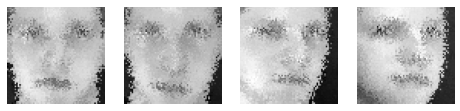

Model		: HOG
Set		: jitter-set2
Input Image	: image-0.png
K		: 4
Rank 1 ---> jitter-image-0.png 	: 0.034711076601050495
Rank 2 ---> jitter-image-2.png 	: 0.03650447584055802
Rank 3 ---> jitter-image-1.png 	: 0.036532098673076295
Rank 4 ---> jitter-image-4.png 	: 0.037482893742736244


In [20]:
#Set the parameters for the function

select_folder = 'demo-sets' ### Folder name
select_set = 'jitter-set2'         ### Set name 
input_img = 'image-0.png'  ### Test image as .png
model = 'HOG'                ### Model name from 'CM8x8, ELBP, HOG'
k=4                         ### Top 'K'

test_img_path = 'C:\\Users\\hp\\OneDrive\\Desktop\\'+ select_folder + '\\' + select_set + '\\'

#Call the function
out, f = task_3(test_img_path, input_img, model, k)

#Plot most similar k images
fig = plt.figure(figsize=(k*2, 8))
columns = k
rows = 1
j=0
for i in out:
    fig.add_subplot(rows, columns,j+1)
    plt.axis('off')
    j+=1
    plt.imshow(plt.imread(i), cmap='gray')
plt.show()

print('Model\t\t:', model)
print('Set\t\t:',select_set)
print('Input Image\t:', input_img)
print('K\t\t:', k)
for i in range(0,k):
    print("Rank",i+1, "--->",out[i],"\t:",f[i])

## Task 4:  
### Implement a program which, given a folder with images and an image ID and a value “k”, returns and visualizes the most similar k images based on all corresponding visual descriptors. For each match, also list the overall matching score and the contributions of the individual visual models.

In [22]:
def task_4(test_img_path, input_img, k=4):
    
    os.chdir(test_img_path)
    img = image.load_img(input_img, target_size =(64, 64), color_mode='grayscale' )
    test_img = image.img_to_array(img).reshape((64,64))
    
    set1_f = os.listdir(test_img_path)
    n=len(set1_f)
    for f in set1_f:
        if not(f.endswith(".png")):
            set1_f.remove(f)
    
    test_cm = calculate_CM(test_img)
    test_lbp = calculate_LBP(test_img)
    test_hog = calculate_HOG(test_img)
    
    cm_all=[]
    lbp_all=[]
    hog_all=[]
    
    for im in set1_f:
        img = image.load_img(im, target_size =(64, 64), color_mode='grayscale' )
        i = image.img_to_array(img).reshape((64,64))
        cm_all.append(calculate_CM(i))
        lbp_all.append(calculate_LBP(i))
        hog_all.append(calculate_HOG(i))

    cm_dist_tem={}
    lbp_dist_tem={}
    hog_dist_tem={}
    
    i=0
    for j in set1_f:
        cm_dist_tem[j] = wasserstein_distance(np.array(test_cm).flatten(), np.array(cm_all[i]).flatten())
        lbp_dist_tem[j] = correlation(np.array(test_lbp).flatten(), np.array(lbp_all[i]).flatten())
        hog_dist_tem[j] = wasserstein_distance(np.array(test_hog).flatten(), np.array(hog_all[i]).flatten())
        i+=1
    
    i=0
    cm_dist={}
    norm_cm = normalize([np.asarray(list(cm_dist_tem.values()))])
    
    for K in set1_f:
        cm_dist[K] = norm_cm[0][i]
        i+=1

    i=0
    lbp_dist={}
    norm_lbp = normalize([np.asarray(list(lbp_dist_tem.values()))])
    for K in set1_f:
        lbp_dist[K] = norm_lbp[0][i]
        i+=1
        
    i=0
    hog_dist={}
    norm_hog = normalize([np.asarray(list(hog_dist_tem.values()))]) 
    for K in set1_f:
        hog_dist[K] = norm_hog[0][i]
        i+=1
    

    all_model={}
    all_model_min=[]
    w_cm = 0.4
    w_lbp = 0.2
    w_hog = 0.4
    
    for i in set1_f:
        all_model[i] = w_cm * cm_dist[i] + w_lbp * lbp_dist[i] + w_hog * hog_dist[i]
    
    all_model_min = sorted(all_model.values())
    all_model_min = all_model_min[1:k+1]
    
    best_id=[]
    for i in all_model_min:
        best_id.append(list(all_model.values()).index(i))
    
    best_img_id=[]
    for i in best_id:
        best_img_id.append(list(all_model.keys())[i])
    return best_img_id, all_model_min

## Task 4: Output

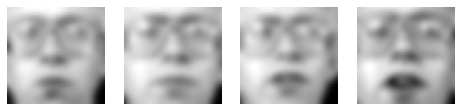

Weights of CM, ELBP, HOG are 0.4, 0.2, 0.4
Set		: smooth-set2
Input Image	: image-0.png
K		: 4
Rank 1 ---> smooth-image-12.png 	: 0.20948008715475758
Rank 2 ---> smooth-image-11.png 	: 0.22245517062399034
Rank 3 ---> smooth-image-13.png 	: 0.22568964002114358
Rank 4 ---> smooth-image-14.png 	: 0.250083367942422


In [24]:
select_folder = 'demo-sets' ### Folder name
select_set = 'smooth-set2'         ### Set name 
input_img = 'image-0.png'  ### Test image as .png
k=4                         ### Top 'K'

test_img_path = 'C:\\Users\\hp\\OneDrive\\Desktop\\'+ select_folder + '\\' + select_set + '\\'

#Call the function
out,f = task_4(test_img_path, input_img, k)

#Plot most similar k images
fig = plt.figure(figsize=(k*2, 8))
columns = k
rows = 1
j=0
for i in out:
    fig.add_subplot(rows, columns,j+1)
    plt.axis('off')
    j+=1
    plt.imshow(plt.imread(i), cmap='gray')
plt.show()

print('Weights of CM, ELBP, HOG are 0.4, 0.2, 0.4')
print('Set\t\t:',select_set)
print('Input Image\t:', input_img)
print('K\t\t:', k)
for i in range(0,k):
    print("Rank",i+1, "--->",out[i],"\t:",f[i])